<center> <p style="font-size: 40px;"> Usando modelo KNN na classificação de casos de Alzheimer <p>
<center><img src="https://www.researchgate.net/profile/Jyoti-Islam/publication/320829965/figure/fig3/AS:579250923241478@1515115590675/Sample-images-from-OASIS-dataset.png">

## Contextualização

A doença de Alzheimer (DA), caracterizada pelo neuropatologista alemão Alois Alzheimer em 1907, é uma afecção neurodegenerativa progressiva e irreversível de aparecimento insidioso, que acarreta perda da memória e diversos distúrbios cognitivos. Em geral, a DA de acometimento tardio, de incidência ao redor de 60 anos de idade, ocorre de forma esporádica, enquanto que a DA de acometimento precoce, de incidência ao redor de 40 anos, mostra recorrência familiar. A DA de acometimento tardio e a DA de acometimento precoce são uma mesma e indistinguível unidade clínica e nosológica [[1]](https://www.scielo.br/j/rbp/a/DbpBDqKVTnsfyF3HHTDCkNN/).
A escala clínica usada para avaliar o estágio de gravidade da demência em pacientes são: demência muito leve, demência leve, demência moderada, além de sem demência, para pascientes onde a doença não foi detectada. Pela divisão em classes temos um problema de classificação, e para classificação podemos usar modelos espeficos para o tema um dos muitos disponivéis é o KNN. 

O KNN (K-vizinhos mais próximos, ou "K-nearest neighbors") é um modelo de classificação por vizinhança. A letra "K" representa uma variável que indica a quantidade de vizinhos mais próximos usados para classificar problemas. Os modelos KNN são considerados modelos de classificação simples, nos quais a observação dos vizinhos mais próximos leva a deduzir que o objeto observado também pertence à mesma classe que seus vizinhos [[2]](https://didatica.tech/o-que-e-e-como-funciona-o-algoritmo-knn/). O KNN é um modelo de aprendizado de máquina supervisionado, o que significa que o modelo necessita de dados pré-classificados para o aprendizado do modelo. Essa abordagem pode ser visualizada na Figura 1. A criação de um modelo de classificação facilitaria a emissão de um diagnóstico mais rápido, sem a necessidade do tempo de espera da análise profissional na área, auxiliando e agilizando os processos de tratamento.
<center>
<figure>
    <p>Figura 1: Classificador KNN</p>
    <img src="./anigif-knn.gif" height="340" width="340" 
         alt="Elephant at sunset">
    <figcaption style="font-size: 5px;">Fonte: https://didatica.tech/o-que-e-e-como-funciona-o-algoritmo-knn/</figcaption>
</figure>
</center>

## Dados 

O OASIS Brains, também conhecido como Open Access Series of Imaging Studies, é um projeto que visa tornar conjuntos de dados de neuroimagem do cérebro disponíveis gratuitamente para a comunidade científica [[3]](https://www.oasis-brains.org/). Os conjuntos de dados OASIS hospedados por central.xnat.org fornecem à comunidade acesso aberto a um banco de dados significativo de neuroimagem e dados de imagem processados ​​em um amplo espectro demográfico, cognitivo e genético, uma plataforma facilmente acessível para uso em neuroimagem, pesquisa clínica e cognitiva no envelhecimento normal e no declínio cognitivo [[4]](https://www.re3data.org/repository/r3d100012182).
Os dados utilizados nesse documento são o dados da base OASIS-1, "Este conjunto consiste em uma coleção transversal de 416 indivíduos com idades entre 18 e 96 anos. Para cada indivíduo, são incluídos 3 ou 4 exames individuais de ressonância magnética ponderada em T1 obtidos em sessões únicas de exame. Os sujeitos são todos destros e incluem homens e mulheres. 100 dos indivíduos incluídos com mais de 60 anos de idade foram diagnosticados clinicamente com doença de Alzheimer (AD) muito leve a moderada."[[5]](https://www.oasis-brains.org/#data).
<br><br>
Referência: <br>
Marcus, D. S., Fotenos, A. F., Csernansky, J. G., Morris, J. C., & Buckner, R. L. (2010). Open Access Series of Imaging Studies (OASIS): longitudinal MRI data in nondemented and demented older adults. Journal of cognitive neuroscience, 22(12), 2677-2684. [Website](https://www.oasis-brains.org)

### Pré-processamento

A leitura e manipulação dos dados serão feitas majoritariamente com a biblioteca pandas, a qual é utilizada para manipulação de dados. Mais informações estão disponíveis na documentação oficial: [Pandas](https://pandas.pydata.org/)

A seguir, a célula importa os dados e exibe os cinco primeiros registros disponíveis. Cada coluna contém informações essenciais sobre os pacientes, incluindo seu `ID (identificação)`, `sexo (M/F)`, `mão dominante (Hand)`, `idade (Age)`,` nível de educação (Edu)`, `status socioeconômico (SES)`, pontuação no `Mini-Mental State Examination (MMSE)` que avalia a função cognitiva, classificação do `Clinical Dementia Rating (CDR)` que indica o estágio de gravidade da demência, `volume total do cérebro e do crânio (eTIV)`, `Volume Cerebral Total Normalizado (nWBV)` que mede o volume cerebral relativo ao tamanho total do cérebro, e o valor único do `tamanho relativo do cérebro em relação a um atlas padrão (ASF)`. Além disso, há o `atraso (Delay)`, medido em meses, entre a aquisição das imagens cerebrais e a avaliação clínica ou cognitiva dos participantes. Esses dados são fundamentais para a análise e estudo da função cerebral e sua relação com fatores demográficos e clínicos. <br> Fonte: <br>[Open Access Series of Imaging Studies (OASIS).](https://www.oasis-brains.org/files/oasis_cross-sectional_facts.pdf)

In [524]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
dataset = pd.read_csv("./oasis_cross-sectional.csv")
dataset.head(5)

,ID,M/F,Hand,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Delay
0,OAS1_0001_MR1,F,R,74,2.0,3.0,29.0,0.0,1344,0.743,1.306,NaN
1,OAS1_0002_MR1,F,R,55,4.0,1.0,29.0,0.0,1147,0.810,1.531,NaN
2,OAS1_0003_MR1,F,R,73,4.0,3.0,27.0,0.5,1454,0.708,1.207,NaN
3,OAS1_0004_MR1,M,R,28,NaN,NaN,NaN,NaN,1588,0.803,1.105,NaN
4,OAS1_0005_MR1,M,R,18,NaN,NaN,NaN,NaN,1737,0.848,1.010,NaN


A célula abaixo apresenta a contagem de dados faltosos em cada coluna:

In [525]:
dataset.isna().sum().sort_values()

ID         0
M/F        0
Hand       0
Age        0
eTIV       0
nWBV       0
ASF        0
Educ     201
MMSE     201
CDR      201
SES      220
Delay    416
dtype: int64

As seguintes colunas serão descartadas logo de cara: `Delay`, devido ao grande volume de dados faltosos, e `ID`, pois não traz nenhum valor estatístico imediato, embora o código do ID esteja relacionado às visitas no conjunto de dados. Além da coluna `Hand`, já que foi notado que todos os avaliados são destros.

In [526]:
print("Mão dominante:", len(dataset['Hand'].unique()))
dataset.drop(['Delay','ID', 'Hand'], axis=1, inplace=True)
display(dataset.head(2))

Mão dominante: 1


,M/F,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF
0,F,74,2.0,3.0,29.0,0.0,1344,0.743,1.306
1,F,55,4.0,1.0,29.0,0.0,1147,0.810,1.531


Serão também removidas as linhas que apresentem algum dado faltante. Também é observado que para a classe de demência mais avançada 2.0, só temos dois casos, por termos o conjunto completo dos dados e usaremos metodos de serparação de treinamento e teste, iremos descartar essa classe, mas não por ser menos importante que as demais, mas por a sua quantidade limitade de dados para a classe.

In [527]:
print(dataset['CDR'].value_counts())
dataset = dataset.loc[dataset['CDR'] != 2.0]
dataset.dropna(inplace=True)
print('\nQuantidade de dados restantes: ', len(dataset['Age']))
dataset = dataset.reset_index(drop=True)
dataset.head()

0.0    135
0.5     70
1.0     28
2.0      2
Name: CDR, dtype: int64

Quantidade de dados restantes:  214


,M/F,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF
0,F,74,2.0,3.0,29.0,0.0,1344,0.743,1.306
1,F,55,4.0,1.0,29.0,0.0,1147,0.810,1.531
2,F,73,4.0,3.0,27.0,0.5,1454,0.708,1.207
3,M,74,5.0,2.0,30.0,0.0,1636,0.689,1.073
4,F,52,3.0,2.0,30.0,0.0,1321,0.827,1.329


Será realizado um estudo sobre a correlação entre as variáveis remanescentes e a variável alvo "CDR". Embora a coluna "M/F" seja qualitativa, será transformada em quantitativa utilizando o método de codificação One Hot-Encoder. A codificação one-hot é um procedimento pelo qual dados categóricos, como dados nominais, são convertidos em recursos numéricos em um conjunto de dados. Geralmente, essa etapa de pré-processamento é necessária, uma vez que os modelos de aprendizado de máquina requerem dados numéricos [[6]](https://datagy.io/sklearn-one-hot-encode/). Também saõ definido rotulos para as classes de `CDR` onde `SD = 0.0`, `DML = 0.5`, `DL = 1.0`.

In [528]:
from sklearn.preprocessing import OneHotEncoder
onehot = OneHotEncoder()
columns = dataset[['M/F']]
qualihot  = onehot.fit_transform(columns)
quali_ohe_df = pd.DataFrame(qualihot.toarray(), columns=onehot.get_feature_names_out())
dataset = pd.concat([dataset, quali_ohe_df], axis=1)
dataset.drop('M/F', axis=1, inplace=True)
dataset.loc[dataset['CDR'] == 0.0, 'CDR_'] = "SD"
dataset.loc[dataset['CDR'] == 0.5, 'CDR_'] = "DML"
dataset.loc[dataset['CDR'] == 1.0, 'CDR_'] = "DL"
#dataset.loc[dataset['CDR'] == 2.0, 'CDR_'] = "DM"
dataset['CDR_'] = dataset['CDR_'].astype('object')
dataset.head()

,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,M/F_F,M/F_M,CDR_
0,74,2.0,3.0,29.0,0.0,1344,0.743,1.306,1.0,0.0,SD
1,55,4.0,1.0,29.0,0.0,1147,0.810,1.531,1.0,0.0,SD
2,73,4.0,3.0,27.0,0.5,1454,0.708,1.207,1.0,0.0,DML
3,74,5.0,2.0,30.0,0.0,1636,0.689,1.073,0.0,1.0,SD
4,52,3.0,2.0,30.0,0.0,1321,0.827,1.329,1.0,0.0,SD


Com todas as colunas numéricas, é possível analisar a correlação das variáveis. Através da utilização da correlação de Pearson padrão na função corrwith, é observado as variáveis com maior correlação. As variáveis MMSE, nWBV e Age apresentam uma correlação mais forte, sendo somente a idade que influencia positivamente nos casos de Alzheimer. O gráfico de calor também exibe a relação entre todas as variáveis.

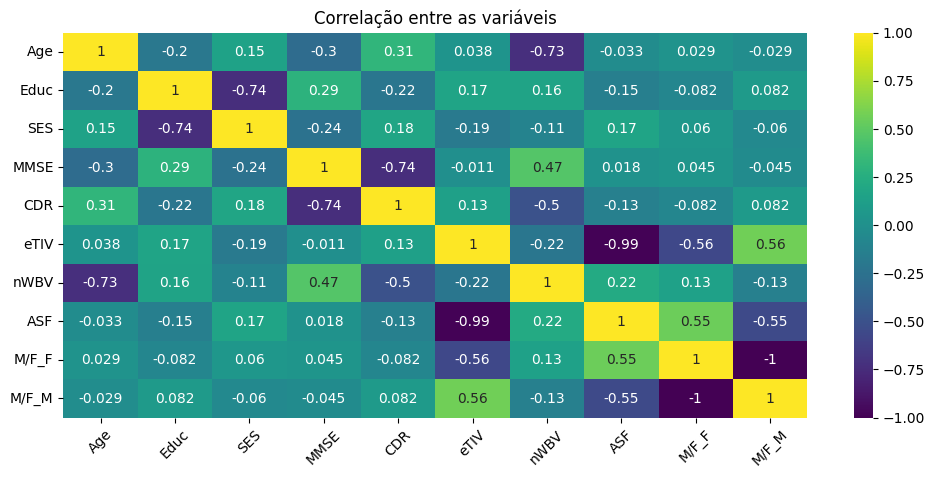

MMSE    -0.739747
nWBV    -0.495352
Age      0.310039
Educ    -0.217249
SES      0.178845
ASF     -0.134869
eTIV     0.127219
M/F_F   -0.081782
M/F_M    0.081782
dtype: float64


In [529]:
def plot_corr(data=dataset, col = True):
    plt.subplots(figsize=(12,5))
    gender_correlation=data.corr(numeric_only=True)
    sns.heatmap(gender_correlation, annot=True, cmap='viridis')
    plt.title('Correlação entre as variáveis')
    plt.xticks(rotation=45)
    plt.show()
    if col:
        col1 = 'CDR'
        correlacao = data.drop(col1, axis=1).corrwith(data[col1], numeric_only=True).sort_values(ascending=False)
        ordem = data.drop(col1, axis=1).corrwith(data[col1], numeric_only=True).abs().sort_values(ascending=False)
        print(correlacao.reindex(ordem.index))

plot_corr()

A padronização dos dados é uma técnica que ajuda a reduzir a dimensionalidade e, ao mesmo tempo, garante que eles sejam mais úteis, especialmente no cálculo de distâncias por algoritmos. Para realizar essa padronização, podemos utilizar a função `StandardScaler` do pacote `sklearn`. A padronização é um passo importante no pré-processamento de dados antes de aplicarmos algoritmos de aprendizado de máquina, principalmente quando lidamos com variáveis em escalas diferentes. Ao padronizar os dados, os colocamos numa escala com média zero e desvio padrão igual a um, mantendo as relações proporcionais entre eles.

In [530]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_temp = pd.DataFrame(scaler.fit_transform(dataset.drop('CDR_', axis=1)), columns=dataset.drop('CDR_', axis=1).columns)
data_temp['CDR_'] = dataset['CDR_']
dataset = data_temp
dataset_pca = dataset

Os gráficos abaixo mostram como os dados de demência estão distribuídos em relação às variáveis mais correlacionadas. É possível observar uma segmentação dos dados ao trabalharmos com três dimensões. Portanto, todas as três variáveis serão incluídas no modelo.

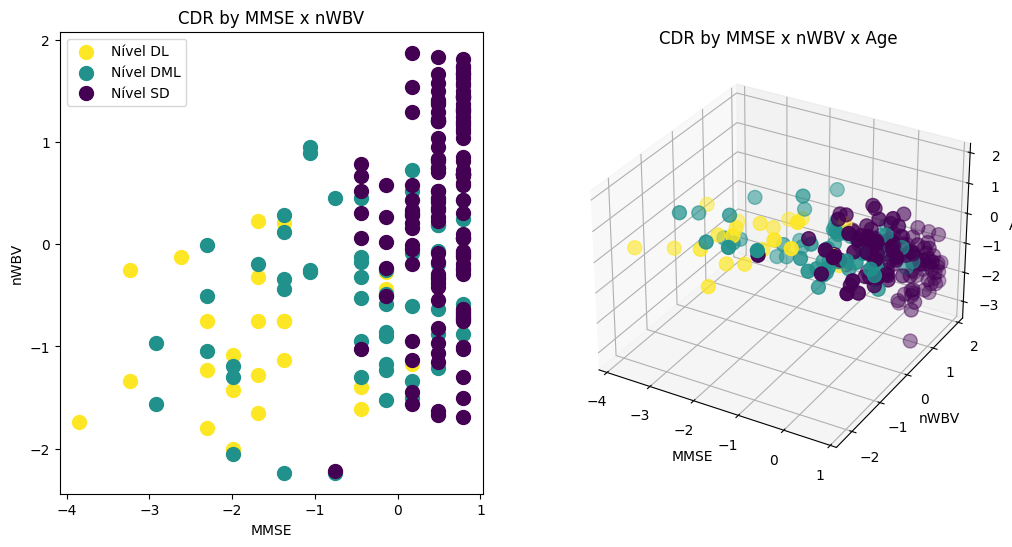

In [531]:
x = dataset['MMSE']
y = dataset['nWBV']
z = dataset['Age']
w = dataset['CDR']
tipos_demencia = dataset['CDR_']

categorias = tipos_demencia.unique()
num_cores = len(categorias)
palette = plt.get_cmap('viridis', num_cores)
cores = {cat: palette(i) for i, cat in enumerate(categorias)}

fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(121)

for classe, grupo in dataset.groupby('CDR_'):
    marcador = 'o'  
    cor = cores[classe]  
    ax1.scatter(grupo['MMSE'], grupo['nWBV'], c=[cor], s=100, marker=marcador, label='Nível '+ classe)

ax1.set_xlabel('MMSE')
ax1.set_ylabel('nWBV')
ax1.legend()
ax1.set_title('CDR by MMSE x nWBV')

ax2 = fig.add_subplot(122, projection='3d')
scatter_plot = ax2.scatter(x, y, z, c=w, cmap='viridis', s=100)

ax2.set_xlabel('MMSE')
ax2.set_ylabel('nWBV')
ax2.set_zlabel('Age')
ax2.set_title('CDR by MMSE x nWBV x Age')

plt.show()


## KNN

Conforme ilustrado na Figura 1, o KNN utiliza classificação por vizinhança, calculando a distância entre uma variável e as variáveis de seu entorno. Em seguida, classifica a variável com base na classe mais frequente entre os vizinhos mais próximos. As distâncias são calculadas usando principalmente a distância euclidiana ou outra métrica escolhida entre uma variável `x` e outras do conjunto de treinamento. A fórmula abaixo mostra o cálculo da distância euclidiana:
$$dist(x_i, y_i) = \sqrt{(x_1 - y_1)^2 + (x_2 - y_2)^2 + \ldots + (x_m - y_m)^2}$$
Após o cálculo das distâncias, é feita uma seleção dos K pontos mais próximos. A classe é geralmente definida pela moda da vizinhança, ou seja, a classe que ocorre com mais frequência entre os K vizinhos mais próximos. Isso torna o KNN um algoritmo de aprendizado de máquina supervisionado, pois requer rótulos das amostras do conjunto de treinamento para fazer previsões precisas.  <br>
 O KNN também pode ser adaptado para problemas de regressão, mas a fórmula é modificada para calcular uma média ponderada das saídas dos `K` vizinhos mais próximos, em vez de fazer uma votação. <br><br>
Fontes:<br>
[An Introduction to K-Nearest Neighbors Algorithm | by Indhumathy Chelliah](https://towardsdatascience.com/an-introduction-to-k-nearest-neighbours-algorithm-3ddc99883acd)<br>
[KNN (K-Nearest Neighbors) 1. How it works? | by Italo José | Towards Data Science](https://towardsdatascience.com/knn-k-nearest-neighbors-1-a4707b24bd1d)


Não será necessário criar funções para o KNN devido à quantidade de pacotes disponíveis. No Python, o a classe `KNeighborsClassifier` do pacote `scikit-learn` já contém toda a implementação necessária. Além disso, para separar os dados em conjuntos de treinamento e validação, é possivél utilizar a função `train_test_split` do mesmo pacote.

In [532]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
dataset_ = dataset[['MMSE', 'nWBV', 'Age','CDR_']]
train, test = train_test_split(dataset_, test_size = 0.15, random_state = 17)

A busca por hiperparâmetros pode ser exaustiva, portanto, recorre-se a métodos automatizados de busca de hiperparâmetros, como o GridSearch. A busca em grade procura a melhor combinação de hiperparâmetros com base em uma lista pré-definida de valores a serem testados para cada parâmetro. Isso permite que o modelo seja ajustado de forma mais eficiente em busca dos melhores hiperparâmetros para obter o melhor desempenho possível. O GridSearchCV, da biblioteca scikit-learn, é uma implementação do GridSearch com validação cruzada, que permite avaliar a performance do modelo em diferentes combinações de hiperparâmetros através da divisão dos dados em conjuntos de treinamento e validação. Assim, o GridSearchCV ajuda a selecionar os melhores hiperparâmetros de forma mais confiável, evitando problemas de overfitting e garantindo a generalização do modelo para novos dados. <br>
Os hiperparâmetros na variavél `param` representam:<br>
- `n_neighbors`: Número de vizinhos.
- `weights` :
    - `uniform`: Nessa opção, todos os vizinhos mais próximos têm o mesmo peso. 
    - `distance`: Nessa opção, os vizinhos mais próximos têm pesos inversamente proporcionais à sua distância em relação à amostra a ser classificada. 
- `metric`: [Tipo de distância utilizada](https://edisciplinas.usp.br/pluginfile.php/5309062/mod_resource/content/1/AM_Aula06.pdf): 
    - 1 para distância de Manhattan, a distância de Manhattan (“City Block” ou
“Geometria do Táxi”) é uma forma de geometria
em que a usual métrica da geometria euclidiana
é substituída por uma nova métrica em que a
distância entre dois pontos é a soma das
diferenças absolutas de suas coordenadas. $$ \text{dist}(x, y) = \sum_{i=1}^{n} |x_i - y_i| $$
    - 2 para distância Euclidiana, já foi comentada, mas é dada pela formula: $$dist(x_i, y_i) = \sqrt{(x_1 - y_1)^2 + (x_2 - y_2)^2 + \ldots + (x_m - y_m)^2}$$
    - 3 para distância de Minkowski, a distância de Minkowski é uma métrica em um
espaço vetorial normado, a qual pode ser
considerada como uma generalização de ambas as
distâncias euclidiana e Manhattan. $$ \text{dist}(x, y) = \left( \sum_{i=1}^{n} |x_i - y_i|^p \right)^{\frac{1}{p}} $$
- `p` : int, padrão=2
    Parâmetro de potência para a métrica de Minkowski. Quando p = 1, isso é equivalente a usar manhattan_distance (l1) e euclidean_distance (l2) para p = 2. Para p arbitrário, minkowski_distance (l_p) é usado.

In [533]:
from sklearn.model_selection import GridSearchCV
param = {
    'n_neighbors': list(range(1, 41, 2)),    
    'weights': ['uniform', 'distance'],  
    'metric': ['euclidean','minkowski', 'manhattan'],
    'p': [1, 2]
}
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param, cv=3)  # validação com 3 dobras
grid_search.fit(train.drop('CDR_', axis=1), train['CDR_'])
print("Melhores hiperparâmetros:")
print(grid_search.best_params_)
#Melhores hiperparâmetros:
#{'metric': 'euclidean', 'n_neighbors': 17, 'p': 1, 'weights': 'distance'}

Melhores hiperparâmetros:
{'metric': 'minkowski', 'n_neighbors': 13, 'p': 1, 'weights': 'uniform'}


In [534]:
## randomsearch não implementado
from sklearn.model_selection import RandomizedSearchCV
random_search = RandomizedSearchCV(knn, param_distributions=param, n_iter=50, cv=5, random_state=42, n_jobs=-1)
random_search.fit(train.drop('CDR_', axis=1), train['CDR_'])
"""Melhores hiperparâmetros: {'weights': 'distance', 'p': 1, 'n_neighbors': 21, 'metric': 'manhattan'}"""

"Melhores hiperparâmetros: {'weights': 'distance', 'p': 1, 'n_neighbors': 21, 'metric': 'manhattan'}"

In [535]:
previsao =  grid_search.predict(test.drop('CDR_', axis=1))

In [536]:
data_prev = pd.DataFrame({'Previsão': previsao, 'Esperado':test['CDR_']})
data_prev

,Previsão,Esperado
28,SD,SD
206,SD,SD
189,SD,DML
37,SD,SD
169,SD,SD
38,DL,DL
151,DML,SD
54,SD,SD
71,DML,DML
115,SD,SD


A verificação da qualidade do modelo para a amostra testada usando a classe `classification_report` também disponivél no pacote `sklearn`, que tras um conjunto de metricas especificas para classifcação, sendo elas: 
- Precision (Precisão): A precisão é a proporção de instâncias corretamente classificadas como positivas (TP) em relação a todas as instâncias classificadas como positivas (TP + FP). Essa métrica mede a capacidade do modelo de fazer previsões corretas para uma classe específica.
- Recall (Sensibilidade ou Revocação): O recall é a proporção de instâncias corretamente classificadas como positivas (TP) em relação ao total de instâncias positivas (TP + FN). Essa métrica mede a capacidade do modelo de detectar corretamente todas as instâncias da classe positiva.
- F1-score: O F1-score é uma métrica que combina a precisão e o recall em uma única pontuação. É útil quando há um desequilíbrio entre as classes, pois leva em consideração tanto os falsos positivos quanto os falsos negativos.
- Support (Suporte): O suporte é o número total de instâncias reais para cada classe. É a quantidade de amostras que pertencem a cada classe. <br>

Além disso, o `classification_report` também calcula a acurácia da previsão e as métricas agregadas, como a média macro e a média ponderada das métricas para todas as classes. A média macro é a média não ponderada das métricas, enquanto a média ponderada é a média ponderada das métricas pelo suporte de cada classe.
Maiores informações sobre a classe podem ser encontradas na documentação oficial: [classification_report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html#sklearn.metrics.classification_report)

Embora a abordagem da classificação tenha sido simples, o modelo teve uma precisão considerável em casos de pessoas sem demência, chegando a 93% de precisão, no entanto, houve uma precisão reduzida em casos de demência leve. Os casos de demência moderada ou severa não foram trabalhados devido à falta de dados na base. O potencial da análise não foi explorado em sua totalidade, pois variáveis como ASF e eTIV, assim como nWBV, contêm informações sobre o tamanho do cérebro e do crânio. A junção dessas variáveis em um mesmo componente pode ser vantajosa para o modelo, e isso pode ser explorado em modelos futuros. Apesar disso, o modelo KNN mostrou-se eficaz na classificação do problema abordado, como mostrado nos dados abaixo, apresentando uma acurácia total de 86%.

In [537]:
from sklearn.metrics import classification_report
classes = { "SD": 0,  "DML": 1,  "DL": 2 }
print("\nRelatório de Classificação:")
print(classification_report(data_prev['Esperado'].map(classes), data_prev['Previsão'].map(classes), target_names=classes.keys()))


Relatório de Classificação:
              precision    recall  f1-score   support

          SD       0.83      0.83      0.83        23
         DML       0.33      0.33      0.33         6
          DL       0.75      0.75      0.75         4

    accuracy                           0.73        33
   macro avg       0.64      0.64      0.64        33
weighted avg       0.73      0.73      0.73        33



## PCA

A Análise de Componentes Principais (ACP), ou Principal Component Analysis (PCA), é uma técnica de ciência de dados que viabiliza reduzir grande parte das variáveis de um conjunto de dados em poucos componentes principais que explicam grande parte da variação dos dados.<br>
O PCA é uma técnica estatística de ciência de dados capaz de resumir as variáveis de um conjunto de dados em “componentes principais” que contém a maior parte da variância das variáveis originais. O PCA recria os dados de uma forma mais representativa por meio de combinações lineares das variáveis.<br>
A quantidade (n) de componentes principais será igual ao número de variáveis originais. Contudo, normalmente em poucos componentes praticamente toda correlação das variáveis originais é “absorvida” e 2 ou 3 componentes contemplam praticamente toda a variância do conjunto de dados.<br>
Os componentes principais (PC's) são classificados por ordem de explicação da variância. Sendo assim, o PC1 explica mais a variabilidade dos dados do que o PC2, e assim por diante. <br>
Fonte: https://cienciaenegocios.com/analise-de-componentes-principais-pca-ou-acp/

Abaixo temos os uma copia dos dados anteriormente utilizados, nos quais foram usados apenas uma separação por corrrelação direta com a varivél alvo. A padronização e codificação é necessaria também nessa etapa, mão já foram feitas em sessões passadas.

In [538]:
dataset_pca.drop('CDR', axis=1, inplace=True)

In [539]:
dataset_pca

,Age,Educ,SES,MMSE,eTIV,nWBV,ASF,M/F_F,M/F_M,CDR_
0,0.133793,-0.936040,0.463997,0.483196,-0.713017,-0.169496,0.687406,0.697217,-0.697217,SD
1,-1.411664,0.570069,-1.325108,0.483196,-1.938079,1.228800,2.430538,0.697217,-0.697217,SD
2,0.052453,0.570069,0.463997,-0.135989,-0.028972,-0.899949,-0.079572,0.697217,-0.697217,DML
3,0.133793,1.323124,-0.430556,0.792789,1.102812,-1.296481,-1.117704,-1.434274,1.434274,SD
4,-1.655684,-0.182985,-0.430556,0.792789,-0.856044,1.583591,0.865593,0.697217,-0.697217,SD
...,...,...,...,...,...,...,...,...,...,...
209,-0.191567,-1.689094,1.358549,0.483196,-1.017728,-0.065146,1.067022,0.697217,-0.697217,DML
210,0.052453,-0.182985,-0.430556,-1.374360,0.480953,-0.440807,-0.583144,0.697217,-0.697217,DML
211,-0.923625,-0.936040,1.358549,0.173603,-0.650831,1.541851,0.617681,0.697217,-0.697217,SD
212,-0.923625,1.323124,-0.430556,0.792789,1.109031,0.602697,-1.125452,-1.434274,1.434274,SD


In [540]:
def test_train_knn(dataset_tets):
    train, test = train_test_split(dataset_tets, test_size = 0.15, random_state = 17)
    grid_search.fit(train.drop('CDR_', axis=1), train['CDR_'])
    previsao =  grid_search.predict(test.drop('CDR_', axis=1))
    data_prev = pd.DataFrame({'Previsão': previsao, 'Esperado':test['CDR_']})
    print(data_prev)
    classes = { "SD": 0,  "DML": 1,  "DL": 2 }
    print("\nRelatório de Classificação:")
    print(classification_report(data_prev['Esperado'].map(classes), data_prev['Previsão'].map(classes), target_names=classes.keys()))

Iniciando PCA

In [541]:
from sklearn.decomposition import PCA

In [542]:
pca = PCA(n_components=3)

In [543]:
pca.fit(dataset_pca.drop('CDR_', axis=1))

PCA(n_components=3)

In [544]:
print(pca.explained_variance_ratio_)

[0.35957232 0.26253922 0.15486284]


In [545]:
print(pca.singular_values_)

[26.31608414 22.48667474 17.27037453]


In [546]:
pd.DataFrame(pca.get_covariance())


,0,1,2,3,4,5,6,7,8
0,0.974744,-0.188024,0.134368,-0.453606,0.065296,-0.661399,-0.067503,0.056598,-0.056598
1,-0.188024,1.016719,-0.680277,0.337386,0.219714,0.166818,-0.205990,-0.036985,0.036985
2,0.134368,-0.680277,1.020983,-0.304897,-0.226199,-0.111801,0.212359,0.027376,-0.027376
3,-0.453606,0.337386,-0.304897,0.733333,-0.041209,0.479075,0.046712,0.032506,-0.032506
4,0.065296,0.219714,-0.226199,-0.041209,1.050051,-0.234115,-0.706403,-0.673875,0.673875
5,-0.661399,0.166818,-0.111801,0.479075,-0.234115,1.061751,0.235117,0.112270,-0.112270
6,-0.067503,-0.205990,0.212359,0.046712,-0.706403,0.235117,1.035267,0.670235,-0.670235
7,0.056598,-0.036985,0.027376,0.032506,-0.673875,0.112270,0.670235,1.074703,-0.738594
8,-0.056598,0.036985,-0.027376,-0.032506,0.673875,-0.112270,-0.670235,-0.738594,1.074703


In [547]:
novo = pca.fit_transform(dataset_pca.drop('CDR_', axis=1))

In [548]:
novo = pd.DataFrame(novo)
novo

,0,1,2
0,-1.521689,0.526428,-0.286358
1,-2.821558,-2.241610,0.033817
2,-0.481112,0.443703,0.798302
3,2.871478,-0.393226,0.703439
4,-1.813732,-1.984330,-0.964680
...,...,...,...
209,-2.104373,1.021610,-1.323087
210,0.006974,0.720915,0.862350
211,-1.873814,-0.298073,-1.873230
212,2.541553,-1.806658,-0.516996


In [549]:
novo['CDR_'] = dataset_pca['CDR_']

In [550]:
test_train_knn(novo)

    Previsão Esperado
28        SD       SD
206       SD       SD
189      DML      DML
37        SD       SD
169       SD       SD
38        DL       DL
151       SD       SD
54        SD       SD
71       DML      DML
115       SD       SD
94        SD      DML
64        SD       SD
0         SD       SD
109       SD      DML
120       DL       DL
128       SD       SD
69       DML      DML
154       SD       SD
93        SD       SD
75        DL       SD
84       DML       SD
190       SD       SD
192       SD       DL
212       SD       SD
48        SD       SD
213       SD       SD
158      DML       SD
159       SD       SD
51        SD       SD
156       SD       SD
176       SD      DML
137       SD       SD
126       SD       DL

Relatório de Classificação:
              precision    recall  f1-score   support

          SD       0.80      0.87      0.83        23
         DML       0.60      0.50      0.55         6
          DL       0.67      0.50      0.57         4

    a

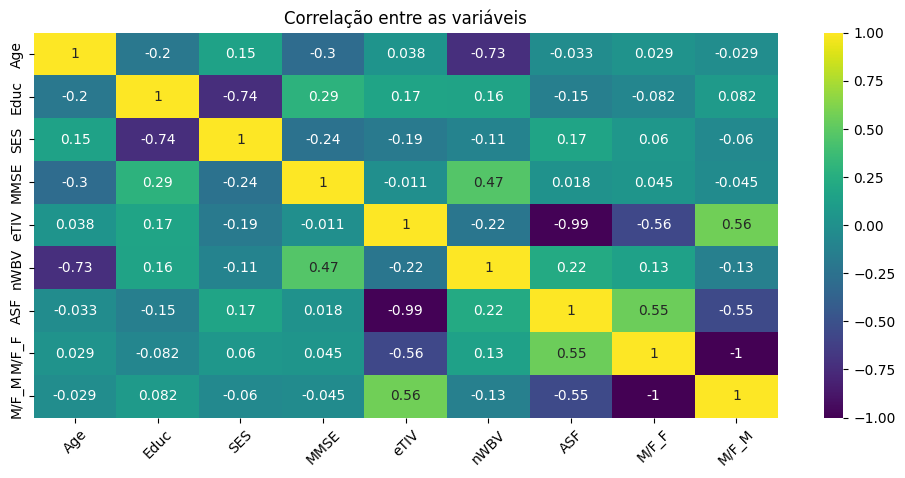

In [551]:
plot_corr(dataset_pca.drop('CDR_', axis=1), col=False)

Variaveis univeis por correlação: <br>
M/F_F + M/F_F <br>
nWBV + Age <br>
ASF + eTIV <br>


In [552]:
pca2 = PCA(n_components=1)

In [553]:
sexo = pca2.fit_transform(dataset_pca[['M/F_F', 'M/F_M']])

In [554]:
nwgb_age = pca2.fit_transform(dataset_pca[['nWBV', 'eTIV']])

In [555]:
asf_etiv = pca2.fit_transform(dataset_pca[['ASF', 'eTIV']])

In [556]:
dataset_pca

,Age,Educ,SES,MMSE,eTIV,nWBV,ASF,M/F_F,M/F_M,CDR_
0,0.133793,-0.936040,0.463997,0.483196,-0.713017,-0.169496,0.687406,0.697217,-0.697217,SD
1,-1.411664,0.570069,-1.325108,0.483196,-1.938079,1.228800,2.430538,0.697217,-0.697217,SD
2,0.052453,0.570069,0.463997,-0.135989,-0.028972,-0.899949,-0.079572,0.697217,-0.697217,DML
3,0.133793,1.323124,-0.430556,0.792789,1.102812,-1.296481,-1.117704,-1.434274,1.434274,SD
4,-1.655684,-0.182985,-0.430556,0.792789,-0.856044,1.583591,0.865593,0.697217,-0.697217,SD
...,...,...,...,...,...,...,...,...,...,...
209,-0.191567,-1.689094,1.358549,0.483196,-1.017728,-0.065146,1.067022,0.697217,-0.697217,DML
210,0.052453,-0.182985,-0.430556,-1.374360,0.480953,-0.440807,-0.583144,0.697217,-0.697217,DML
211,-0.923625,-0.936040,1.358549,0.173603,-0.650831,1.541851,0.617681,0.697217,-0.697217,SD
212,-0.923625,1.323124,-0.430556,0.792789,1.109031,0.602697,-1.125452,-1.434274,1.434274,SD


In [557]:
dataset_pca2 = pd.DataFrame()
dataset_pca2['CDR_'] = dataset_pca['CDR_']
dataset_pca2['MMSE'] = dataset_pca['MMSE']

In [558]:
dataset_pca2['sexo'] = sexo
dataset_pca2['nwgb_age'] = nwgb_age 
#dataset_pca2['nWGB'] = dataset_pca['nWBV']
#dataset_pca2['Age'] = dataset_pca['Age']
dataset_pca2['asf_etiv'] = asf_etiv 

In [559]:
dataset_pca2

,CDR_,MMSE,sexo,nwgb_age,asf_etiv
0,SD,0.483196,-0.986013,-0.384327,-0.990248
1,SD,0.483196,-0.986013,-2.239321,-3.089079
2,DML,-0.135989,-0.986013,0.615874,0.035780
3,SD,0.792789,2.028370,1.696556,1.570142
4,SD,0.792789,-0.986013,-1.725083,-1.217381
...,...,...,...,...,...
209,DML,0.483196,-0.986013,-0.673577,-1.474140
210,DML,-1.374360,-0.986013,0.651783,0.752430
211,SD,0.173603,-0.986013,-1.550460,-0.896973
212,SD,0.792789,2.028370,0.358032,1.580018


In [560]:
test_train_knn(dataset_pca2)

    Previsão Esperado
28        SD       SD
206       SD       SD
189       SD      DML
37        SD       SD
169       SD       SD
38        DL       DL
151       SD       SD
54        SD       SD
71        SD      DML
115       SD       SD
94        SD      DML
64        SD       SD
0         SD       SD
109      DML      DML
120       DL       DL
128       SD       SD
69       DML      DML
154       SD       SD
93        SD       SD
75        SD       SD
84        SD       SD
190       SD       SD
192      DML       DL
212       SD       SD
48        SD       SD
213       SD       SD
158       SD       SD
159       SD       SD
51        SD       SD
156       SD       SD
176       SD      DML
137       SD       SD
126       DL       DL

Relatório de Classificação:
              precision    recall  f1-score   support

          SD       0.85      1.00      0.92        23
         DML       0.67      0.33      0.44         6
          DL       1.00      0.75      0.86         4

    a

Unindo em uma unica componete as variavies relacionada  a tamanho do cranio e cerebro:

In [581]:
cerebro  = pca2.fit_transform(dataset_pca[['eTIV','ASF', 'nWBV']])

In [582]:
dataset_pca3 = pd.DataFrame()

In [583]:
dataset_pca3 =  dataset_pca[['CDR_', 'MMSE','Age']]

In [584]:
dataset_pca3['cerebro'] = cerebro
#dataset_pca3['sexo'] = sexo

C:\Users\Dante\AppData\Local\Temp\ipykernel_30400\1708483432.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_pca3['cerebro'] = cerebro


In [585]:
dataset_pca3['nd'] = dataset_pca['nWBV']
#dataset_pca3['et'] = dataset_pca['eTIV']
dataset_pca3['asf'] = dataset_pca['ASF']

C:\Users\Dante\AppData\Local\Temp\ipykernel_30400\1367064521.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_pca3['nd'] = dataset_pca['nWBV']
C:\Users\Dante\AppData\Local\Temp\ipykernel_30400\1367064521.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_pca3['asf'] = dataset_pca['ASF']


In [586]:
test_train_knn(dataset_pca3)

    Previsão Esperado
28        SD       SD
206       SD       SD
189      DML      DML
37        SD       SD
169       SD       SD
38        DL       DL
151       SD       SD
54        SD       SD
71        SD      DML
115       SD       SD
94       DML      DML
64        SD       SD
0         SD       SD
109      DML      DML
120       DL       DL
128       SD       SD
69       DML      DML
154       SD       SD
93        SD       SD
75        SD       SD
84        SD       SD
190       SD       SD
192       DL       DL
212       SD       SD
48        SD       SD
213       SD       SD
158       SD       SD
159       SD       SD
51        SD       SD
156       SD       SD
176       SD      DML
137       SD       SD
126       DL       DL

Relatório de Classificação:
              precision    recall  f1-score   support

          SD       0.92      1.00      0.96        23
         DML       1.00      0.67      0.80         6
          DL       1.00      1.00      1.00         4

    a

dataset_pca3['nd'] = dataset_pca['nWBV']
#dataset_pca3['et'] = dataset_pca['eTIV']
dataset_pca3['asf'] = dataset_pca['ASF']

Relatório de Classificação:
              precision    recall  f1-score   support

          SD       0.92      1.00      0.96        23
         DML       1.00      0.67      0.80         6
          DL       1.00      1.00      1.00         4

    accuracy                           0.94        33
   macro avg       0.97      0.89      0.92        33
weighted avg       0.94      0.94      0.93        33
